In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import skew
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../Dataset/cleaned_train.csv')
print(df.shape)
df.head()

(6988, 3)


,text,category,stance
0,بيل غيتس تلقى لقاح كوفيد19 من غير تصوير إبر و ...,celebrity,1
1,وزير صح حد يوم تحديد هل بمؤتمروا صحفي كان ما ع...,info_news,1
2,قول رح يكونو أد مسؤولي ب لبنان ما وصل لقاح ؟ أ...,info_news,1
3,تركيا . . وزير صح فخر دين قوجة تلقى أول جرع من...,celebrity,1
4,وئام وهاب شتم دول خليجي في كل طل إعلامي تسافه ...,personal,0


In [5]:
print(df['stance'].value_counts())
print(df['category'].value_counts())


 1    5538
 0    1012
-1     438
Name: stance, dtype: int64
info_news       3616
personal        1025
celebrity        975
plan             606
unrelated        323
others           167
requests         112
rumors            79
advice            67
restrictions      18
Name: category, dtype: int64


In [7]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['stance'], test_size=0.3, random_state=42,stratify=df['stance'])
print(x_train.shape)
print(x_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(4891,)
(2097,)
 1    3876
 0     708
-1     307
Name: stance, dtype: int64
 1    1662
 0     304
-1     131
Name: stance, dtype: int64


0.6737894009125932


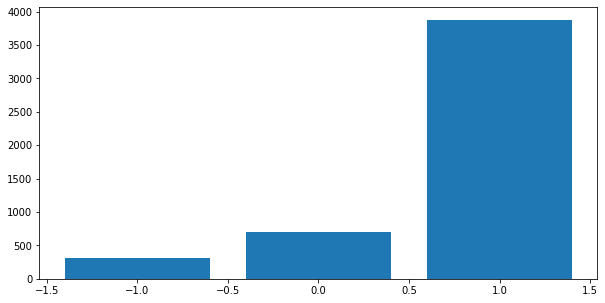

In [8]:
print(skew(y_train.value_counts()))
# plot the skewness
plt.figure(figsize=(10,5))
plt.bar(y_train.value_counts().index,y_train.value_counts().values)
plt.show()

# import seaborn as sns
# sns.distplot(y_train.value_counts())
# plt.show()

In [9]:
clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer(ngram_range=(1,2), max_df=0.6)),
    ('SVM', svm.SVC(kernel='linear', C=1.0, probability=True))
])

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.66      0.19      0.30       131
           0       0.53      0.15      0.24       304
           1       0.82      0.97      0.89      1662

    accuracy                           0.81      2097
   macro avg       0.67      0.44      0.47      2097
weighted avg       0.77      0.81      0.76      2097



In [17]:
clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer(ngram_range=(1,1), max_df=0.5, min_df=2)),
    ('multinomial_NB', MultinomialNB())
])

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.01      0.02       131
           0       0.69      0.07      0.13       304
           1       0.80      1.00      0.89      1662

    accuracy                           0.80      2097
   macro avg       0.83      0.36      0.34      2097
weighted avg       0.80      0.80      0.72      2097



In [12]:
clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer(ngram_range=(1,1), max_df=0.5)),
    ('ٌRandom Forest', RandomForestClassifier(n_estimators=100, random_state=2002))
])

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.66      0.16      0.26       131
           0       0.52      0.12      0.19       304
           1       0.82      0.98      0.89      1662

    accuracy                           0.80      2097
   macro avg       0.66      0.42      0.45      2097
weighted avg       0.76      0.80      0.75      2097

